<a href="https://colab.research.google.com/github/budding-tech-savvy/A-B-Testing-Analysis/blob/main/A_BTesting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **A/B Testing** means analyzing two marketing strategies to choose the best marketing strategy that can convert more traffic into sales (or more traffic into your desired goal) effectively and efficiently.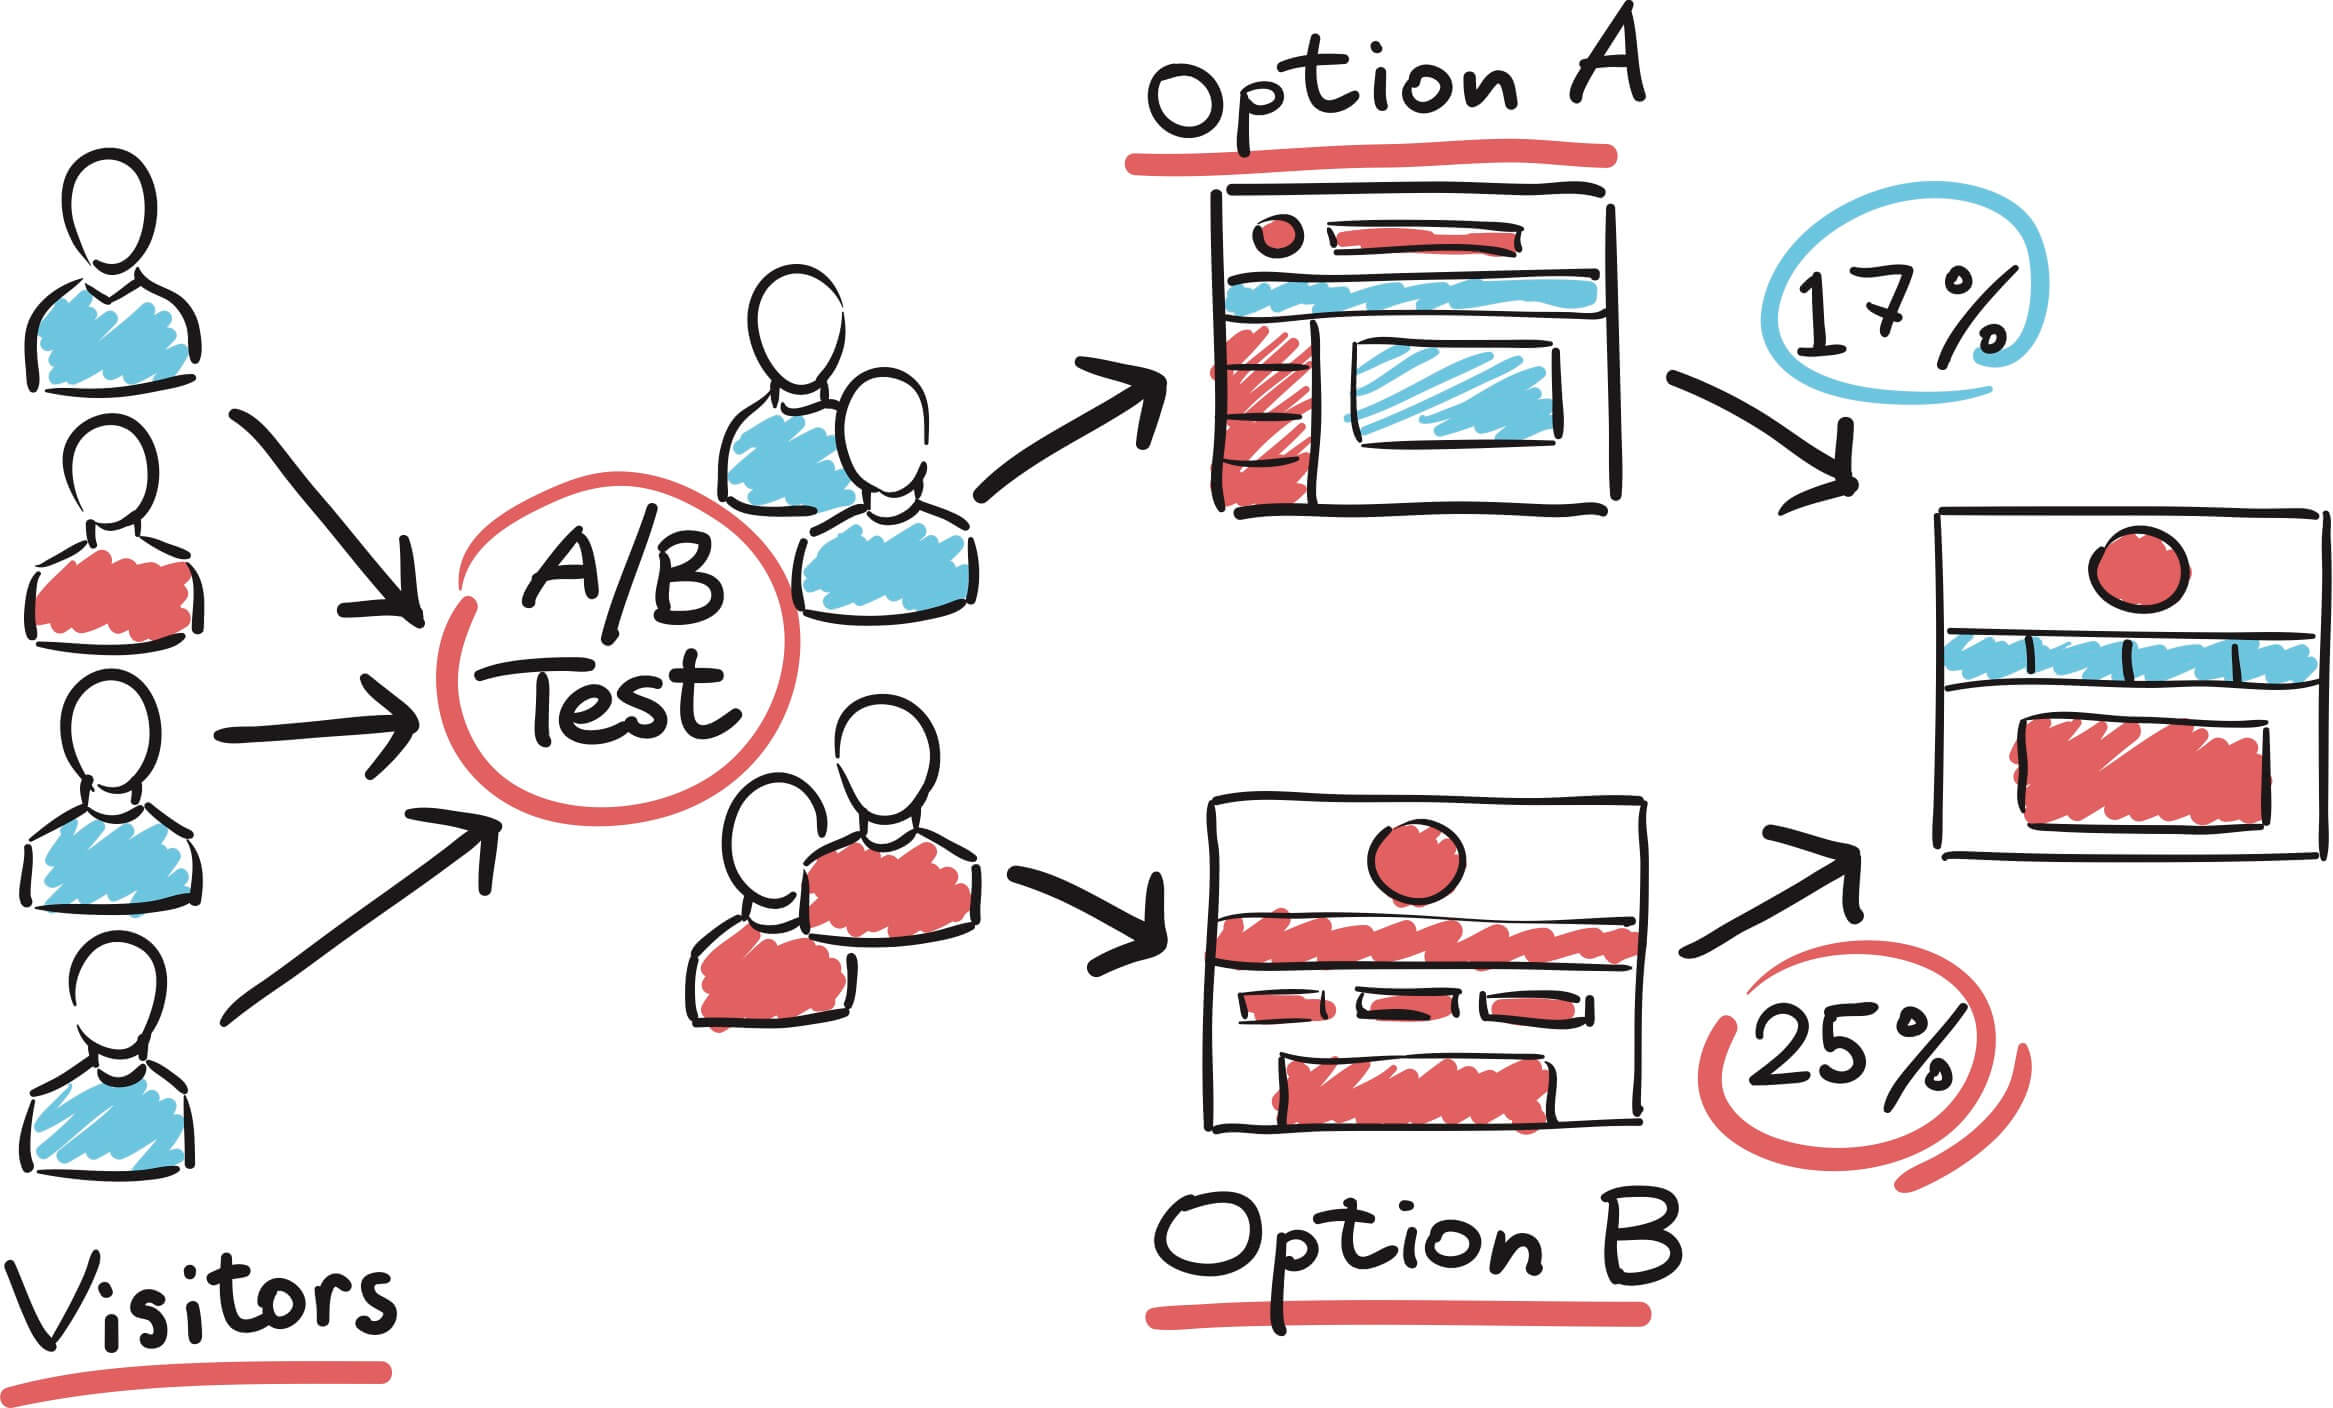:

**In A/B testing**, I analyze the results of two marketing strategies to choose the best one for future marketing campaigns. For example, when I started an ad campaign on Instagram to promote my Instagram post for the very first time, my target audience was different from the target audience of my second ad campaign. After analyzing the results of both ad campaigns, I always preferred the audience of the second ad campaign as it gave better reach and followers than the first one.

That is what A/B testing means. My goal can be to boost sales, followers, or traffic, but when we choose the best marketing strategy according to the results of our previous marketing campaigns, it is nothing but A/B testing.

The dataset we are using here contains two data files about two marketing campaigns (Control Campaign and Test Campaign). Let’s import the necessary Python libraries and both the datasets to get started with the task of A/B testing:

# **A/B Testing Case Study**
A/B testing helps in finding a better approach to finding customers, marketing products, getting a higher reach, or anything that helps a business convert most of its target customers into actual customers.



**Campaign Name:** The name of the campaign

**Date:** Date of the record

**Spend:** Amount spent on the campaign in dollars

**of Impressions:** Number of impressions the ad crossed through the campaign

**Reach:** The number of unique impressions received in the ad

**of Website Clicks:** Number of website clicks received through the ads

**of Searches:** Number of users who performed searches on the website

**of View Content:** Number of users who viewed content and products on the website

**of Add to Cart:** Number of users who added products to the cart

**of Purchase:** Number of purchases

Two campaigns were performed by the company:


**1.Control Campaign**

**2.Test Campaign**

Perform A/B testing to find the best campaign for the company to get more customers.

Let’s import the necessary Python libraries and both the datasets to get started with the task of A/B testing:

In [ ]:
import pandas as pd
import datetime
from datetime import date, timedelta
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly_white"

In summary, the sep parameter in read_csv is used to specify the delimiter used to separate values in the CSV file, allowing you to properly parse and load the data into a DataFrame.

In [ ]:
control_data= pd.read_csv('/control_group.csv', sep=';')
control_data.head(5)

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Control Campaign,2.08.2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
2,Control Campaign,3.08.2019,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0
3,Control Campaign,4.08.2019,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0
4,Control Campaign,5.08.2019,1835,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
test_data=pd.read_csv('/test_group.csv', sep=';')
test_data.head(5)

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Test Campaign,1.08.2019,3008,39550,35820,3038,1946,1069,894,255
1,Test Campaign,2.08.2019,2542,100719,91236,4657,2359,1548,879,677
2,Test Campaign,3.08.2019,2365,70263,45198,7885,2572,2367,1268,578
3,Test Campaign,4.08.2019,2710,78451,25937,4216,2216,1437,566,340
4,Test Campaign,5.08.2019,2297,114295,95138,5863,2106,858,956,768


In both datasets, the names of the columns need to be renamed in order to simplify the decoding of our datasets.

In [ ]:
control_data.columns=["Campaign_Name","Date","Amount_Spent","Number_of_Impressions","Reach","Number_of_web_clicks","Number_of_Searches"
,"Number_Of_View_Content","Added_To_Card","Purchased"]
test_data.columns=["Campaign_Name","Date","Amount_Spent","Number_of_Impressions","Reach","Number_of_web_clicks","Number_of_Searches"
,"Number_Of_View_Content","Added_To_Card","Purchased"]


Now let’s see if the datasets have null values or not

In [ ]:
control_data.isnull().sum()


Campaign Name          0
Date                   0
Spend [USD]            0
# of Impressions       1
Reach                  1
# of Website Clicks    1
# of Searches          1
# of View Content      1
# of Add to Cart       1
# of Purchase          1
dtype: int64

In [ ]:
test_data.isnull().sum()

Campaign_Name             0
Date                      0
Amount_Spent              0
Number_of_Impressions     0
Reach                     0
Number_of_web_clicks      0
Number_of_Searches        0
Number_Of_View_Content    0
Added_To_Card             0
Purchased                 0
dtype: int64

The dataset of the control campaign has missing values in a row. Let’s fill in these missing values by the mean value of each column:

In [ ]:
control_data['Number_of_Impressions'].fillna(control_data['Number_of_Impressions'].mean(), inplace=True)
control_data['Reach'].fillna(control_data['Reach'].mean(), inplace=True)
control_data['Number_of_web_clicks'].fillna(control_data['Number_of_web_clicks'].mean(), inplace=True)
control_data['Number_of_Searches'].fillna(control_data['Number_of_Searches'].mean(), inplace=True)
control_data['Number_Of_View_Content'].fillna(control_data['Number_Of_View_Content'].mean(), inplace=True)
control_data['Added_To_Card'].fillna(control_data['Added_To_Card'].mean(), inplace=True)
control_data['Purchased'].fillna(control_data['Purchased'].mean(), inplace=True)

Now I will create a new dataset by merging both datasets:

In [ ]:
ab_data = control_data.merge(test_data, how="outer").sort_values(["Date"])
ab_data = ab_data.reset_index(drop=True)
print(ab_data.head())

      Campaign_Name        Date  Amount_Spent  Number_of_Impressions    Reach  \
0  Control Campaign   1.08.2019          2280                82702.0  56930.0   
1     Test Campaign   1.08.2019          3008                39550.0  35820.0   
2     Test Campaign  10.08.2019          2790                95054.0  79632.0   
3  Control Campaign  10.08.2019          2149               117624.0  91257.0   
4     Test Campaign  11.08.2019          2420                83633.0  71286.0   

   Number_of_web_clicks  Number_of_Searches  Number_Of_View_Content  \
0                7016.0              2290.0                  2159.0   
1                3038.0              1946.0                  1069.0   
2                8125.0              2312.0                  1804.0   
3                2277.0              2475.0                  1984.0   
4                3750.0              2893.0                  2617.0   

   Added_To_Card  Purchased  
0         1819.0      618.0  
1          894.0      255.

<ipython-input-15-c7df7bd83a6a>:1: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  ab_data = control_data.merge(test_data, how="outer").sort_values(["Date"])


Before moving forward, let’s have a look if the dataset has an equal number of samples about both campaigns:

In [ ]:
print(ab_data["Campaign_Name"].value_counts())

Campaign_Name
Control Campaign    30
Test Campaign       30
Name: count, dtype: int64


The dataset has 30 samples for each campaign. Now let’s start with A/B testing to find the best marketing strategy.

To get started with A/B testing, I will first analyze the relationship between the number of impressions we got from both campaigns and the amount spent on both campaigns

In [ ]:
fig = px.scatter(ab_data, x='Number_of_Impressions', y='Amount_Spent', size='Number_of_Impressions',color='Campaign_Name',
                 hover_name='Campaign_Name', title='Campaign Performance')

# Show plot
fig.show()